<a href="https://colab.research.google.com/github/sushmasri4234/Internship/blob/main/24_04_25_AIML_Internship_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Import the dataset
df = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')  # replace with your actual file path

# View the first few rows
print(df.head())

# Basic info: data types, nulls
print(df.info())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Option 1: Fill missing numerical values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Option 2: Fill missing numerical values with median
# df.fillna(df.median(numeric_only=True), inplace=True)

# Option 3: Forward fill (use with caution)
# df.fillna(method='ffill', inplace=True)


In [ ]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Option 1: One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Option 2: Label encoding (for ordinal or binary categorical)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in cat_cols:
#     df[col] = le.fit_transform(df[col])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


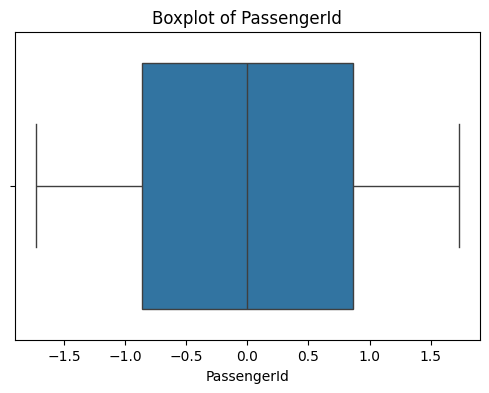

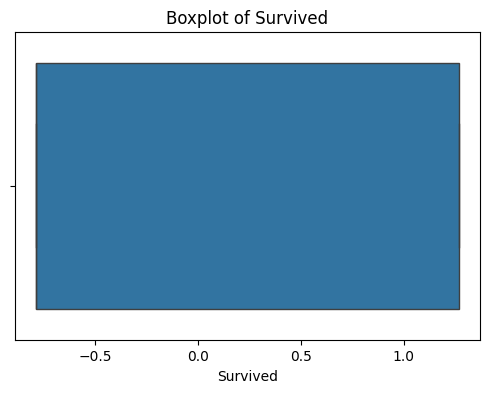

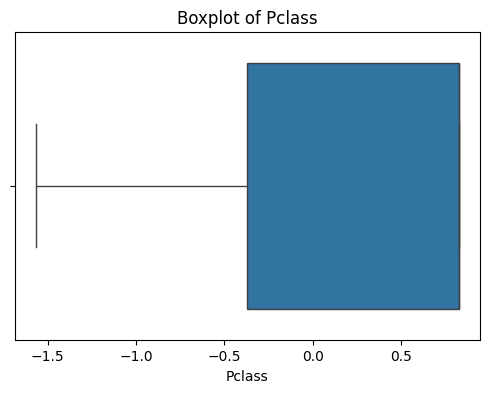

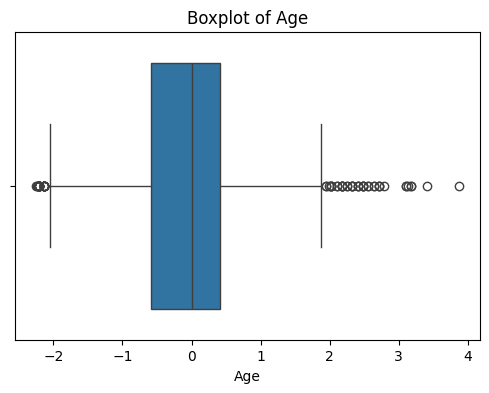

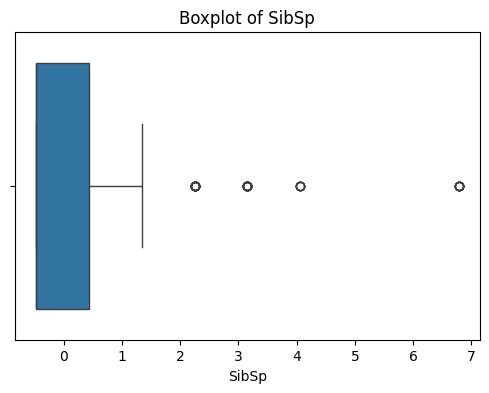

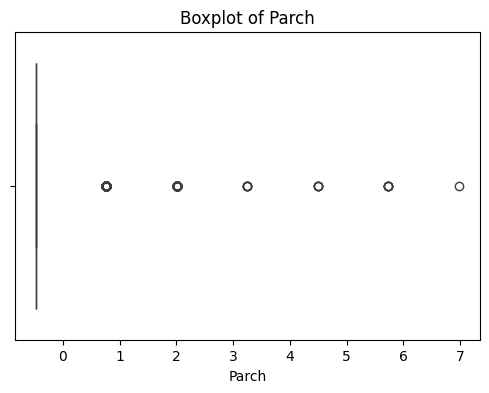

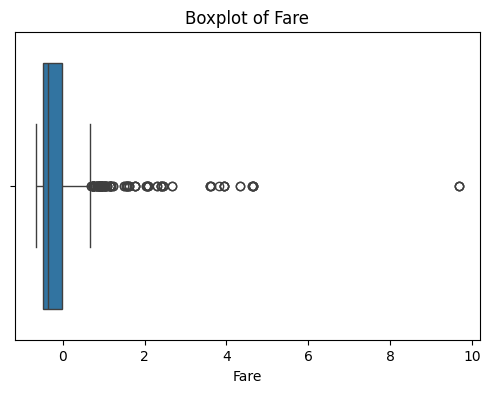

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each numerical feature
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
